# Case Study -- NLP Amazon Reviews (summary and discussion)
### Simon Yang
##### Version 0.1
last update: 25th September 2021

### Notebook, Code, and presentation 

__This Notebook__: you will find a summary of Proof-of-Concept solution I implemented and a discussion of its shortcomings and potential further developments. 

__Code__: the code used to generate the results can be found on github: xxx

__PowerPoint presentation__: I created a short presentation. I intend to use as a support for the case-study interview. 

### Outline

I. __The problem__

II. __One-day solution and implementation__

    - Proprocessing steps
    - Data representation
    - Dealing with overfitting
    
III. __Improving the solution__

    - Hyper-parameter optimization
    - Using helpfullness to preprocess the data
    - Multi-step approach
    - Ensemble modelling and bagging
    
VI. __Potential applications for financial service firms__

### I. The Problem

__Build and present a model predicting the “Overall” Amazon reviews' rating__

Implementing a solution to this problem involves:
1. downloading the Amazon reviews data
2. repackagin JSON into a workable format
3. preparing and preprocessing the review data (features) and the overall ratings (labels)
4.training a model on the prepared features to predict the labels (ratings)
5. testing the model performance on an "unseen" subset of data

### II. A one-day Proof-of-Concept and its implementation

#####  __Overview__

Due to time and computing ressource limitation, we simplify the problem slightly:
1. we only predict three ratings classes: 
    - negative [0/5, 1/5] 
    - neutral  [2/5, 3/5] 
    - positive [4/5, 5/5]
2. we limit ourselves to using the full text reviews
3. we implement only simple methods to prevent overfitting (more advanced method discussed below)
4. we do not attempt optimization of hyperparameters
4. we do not implement advanced performance assesement such as K-fold cross validation. Rather we test our model on an third set of data (test set).

#####  __Proprocessing steps__

1. data is read and repackaged into pandas dataframe
2. first step of data clean-up
    - remove dupplicate entries
    - remove rows with no reviews or overall rating
3. extract helfulness and create a "helpfulness score"
4. Preprocess text reviews:
    - remove contractions
    - make lower-case
    - remove punctuations
    - do not remove stop words (removing creates issues with negative reviews)
    - word lemmatization, i.e., modelled --> model, modelling --> model

#####  __Leveraging the state-of-the art: BERT__

BERT is a pretrained language model for NLP created by Google AI language. The key innovation is the application of a bidirectional encoder, i.e., the words are interprated in context (left and right).

<div>
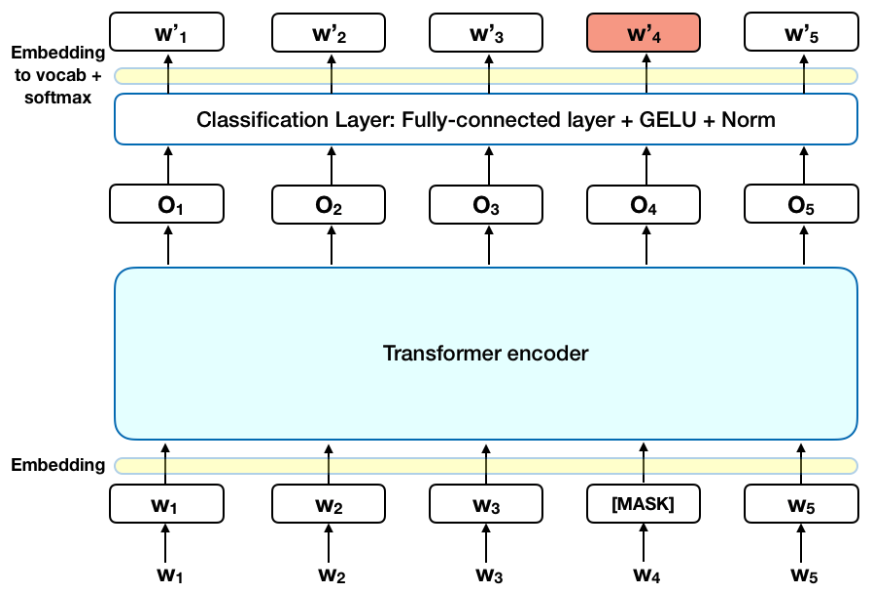
</div>

A classifier layer can easily be added on top of BERT to create a powerfull NLP driven classifier. 

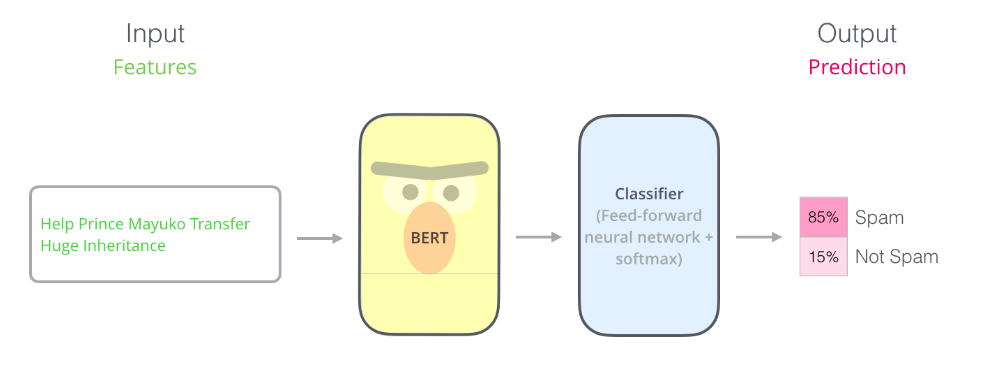
</div>

#####  __Fine tuning of BERT__

- we reserve data for testing by sampling 10000 reviews without replacement
- we sample an addional 10000 review for training and split it into:
    - a training set (80%)
    - a validation set (20%) 
- we extract features from preprocessed text using BERT tokenizor
- train the model to predict three rating classes:
    - 'negative' [0/5, 1/5] 
    - 'neutral'  [2/5, 3/5] 
    - 'positive' [4/5, 5/5]

####  __Hyper parameters__

Due to memory limitation on personal GPU:
    - we are not able to use large batch sizes
    - we cannot run for many epochs
    - we cannot perform an optimization of hyperparameters
- we use suggested initial parameters
    - learning rate = 5e-5
    - shuffle = 100
- We use a batch size = 4. 
- We run for 6 epochs 


#####  __Handling overfitting__

In order to prevent the model from overfitting, we use a simple validation-stop: the training is stopped if the validation loss has not improved over 3 epochs.

There are a number of better ways to prevent overfitting:
- regularization
- train an ensemble of models with varying parameters and data samples
- adding a drop-out layer
    
My personal favorite is to use drop-out which is ususally a low-effort yet powerfull way to prevent overfitting. Ensemble modelling is interesting in the sense that the spread of predictions can give us an indication on uncertainty.

#####  __Testing__

We test our trained model by calculating the accuracy of the rating prediction from a set of reviews that has not be seen by the model. 

Let's look at its overall performance.

Now let's look at its performance for each class. This is best shown by looking at the confusion matrix:

### III. Improving the solution

There are many potential avenues to improve our preduction. Below are a few ideas:

1. Leveraging review helpfullness in a two step process:
    - train model(1) to predict unhelfulness
    - train model(2) to predict ratings by first discarding unhelfull reviews
    - predict helpfullness 
    - if unhelpfull discard, else predict rating
2. Increase computing ressources:
    - Optimize hyperparameters
        - batch size
        - learning rate
    - Train on larger set of data
3. Regularization
    - Train with a dropout layer to prevent overfitting
    - tune dropout parameter
4. Multi-model prediction:
    - Ensemble modeling - run an ensemble of model trained with varying hyperparameters, data sample, preprocessing steps. Use most likely label as the prediction.
    - Stacking: use a meta-model to predict from an ensemble of sub-model predictions (varying hyperparameters, data sample, preprocessing)
    - Use K-means clustering in a two-step two step process:
        - (1) cluster users
        - (2) train a model for each cluster seperatly or use as additional features in the chain

### VI. Potential applications for financial services

- Fraud detection
- Detect compliance breach
- Early controversy detection in the news
- Use NLP for entity detection and scrapping of corporate data:
    - supply chain assesment
    - subsidiary consolidated financial data
    - reported geosegments of revenue and asset
    - asset-level data
- Use sentiment analysis of social media and goodle searches to detect Megatrends